In [10]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import os
%matplotlib inline


# Gather

In [11]:
#read archived tweets into dataframe
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [12]:
#download image predictions from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image-predictions.tsv', 'wb').write(response.content)

335079

In [13]:
#read image predictions into dataframe
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [14]:
#read json data into list, line by line
json_list = []
for line in open('tweet-json.txt', 'r'):
    json_line = json.loads(line)
    tweet_id = json_line['id']
    favorites = json_line['favorite_count']
    retweets = json_line['retweet_count']
    json_list.append({'tweet_id' : tweet_id,
                     'favorite_count' : favorites,
                     'retweet_count' : retweets})
    

In [15]:
#convert list into df
counts_df = pd.DataFrame(json_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])


# Assess

In [25]:
#visually assess counts df
counts_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [23]:
#visually assess tweet archive df
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [24]:
#visually assess image prediction df
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [33]:
archive_df.query('pupper == "pupper"').shape

(257, 17)

In [39]:
archive_df.text.str.contains('pupper').value_counts()

False    2084
True      272
Name: text, dtype: int64

In [40]:
archive_df.query('puppo == "puppo"').shape

(30, 17)

In [41]:
archive_df.text.str.contains('puppo').value_counts()

False    2319
True       37
Name: text, dtype: int64

## counts_df

### quality
    - 2 missing entries compared with archive_df

### tidyness
    - counts_df should be merged with archive_df since they both represent tweet information

## archive_df

### quality
    - 181 entries are retweets which are not wanted.
    - Not all tweets have images.
    - 78 tweets are replies which are not wanted.
    - Retweet and reply columns not needed.
    - Some dog stages are not correct.
    - The timestamp column is a string.

### tidyness
    - Dog stages should be in 1 column where the value is the stage.

## image_df

### quality
    - Some entries are not dog breeds

### tidyness
    - image_df should be merged with archive_df because only the top predicted breed is needed for this analysis.

# Clean

In [13]:
#copy df for the cleaned versions
image_clean = image_df.copy()
archive_clean = archive_df.copy()

#### Some entries are not dog breeds
- Define: Drop rows from image_df that are not dog breeds

In [14]:
#only include predictions that are dogs
image_clean = image_df.query('p1_dog == True')

In [15]:
#test that rows were dropped
image_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

#### 78 tweets are replies which are not wanted.
- Define: Query all rows where replies columns are null and drop the rest to keep only original tweets.

In [16]:
#keep only null values for in_reply_to_user_id
archive_clean = archive_df.query('in_reply_to_user_id != in_reply_to_user_id')

In [17]:
#test
archive_clean.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

#### 181 entries are retweets which are not wanted.
- Define: Query all rows where retweeted columns are null and drop the rest to keep only original tweets.

In [18]:
#keep only null values for retweeted_status_id
archive_clean = archive_clean.query('retweeted_status_id != retweeted_status_id')

In [19]:
#test
archive_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### Retweet and reply columns not needed.
- Define: Drop all 5 columns dealing with replies and retweets as they are all null

In [20]:
#drop all the columns having to do with retweets and replies
drop_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'in_reply_to_status_id']
archive_clean.drop(drop_columns, axis=1, inplace=True)

In [21]:
#test
archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### 2 missing entries compared with archive_df <br/> <br/> counts_df should be merged with archive_df since they both represent tweet information
- Define: merge archive_df with counts_df on tweet_id

In [22]:
#merge archive and counts df on tweet_id
archive_clean = archive_clean.merge(counts_df, on='tweet_id')

In [23]:
#test that random id has correct favorite and retweet counts
counts_df.query('tweet_id == 666051853826850816')

,tweet_id,favorite_count,retweet_count
2347,666051853826850816,1253,879


In [24]:
archive_clean.query('tweet_id == 666051853826850816')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
2090,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None,1253,879


#### The timestamp column is a string.
- Define: Convert timestamp column to datetime type

In [25]:
#change from string to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [26]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 14 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 245.7+ KB


#### Not all tweets have images. <br/> <br/> image_df should be merged with archive_df because only the top predicted breed is needed for this analysis.
- Define: drop all columns except p1 and tweet_id, inner merge image_clean with archive_clean to keep only tweets with pictures 

In [27]:
#drop all columns except tweet_id and first predicted breed
drop_columns = ['p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'img_num', 'jpg_url', 'p1_dog', 'p2_dog', 'p3_dog']
image_clean.drop(drop_columns, axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
#test
image_clean.head(1)

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel


In [29]:
#inner merge archive and image df 
archive_clean = archive_clean.merge(image_clean, on='tweet_id')

In [30]:
#rename p1 to predicted_breed
archive_clean.rename(columns={"p1": "predicted_breed"}, inplace=True)

In [31]:
#test
archive_clean.query('tweet_id == 666020888022790149')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,predicted_breed
1462,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,2535,532,Welsh_springer_spaniel


#### Some dog stages are not correct. <br/> <br/> Dog stages should be in 1 column where the value is the stage.
- Define: extract stage from tweet text and assign to dog_stage column. Drop doggo, floofer, pupper, and puppo columns

In [32]:
#function that reevaluates returns the dog stage mentioned in the tweet
def dog_stage(row):
    if 'doggo' in row['text']:
        stage = 'doggo'
    elif 'floofer' in row['text']:
        stage = 'floofer'
    elif 'pupper' in row['text']:
        stage = 'pupper'
    elif 'puppo' in row['text']:
        stage = 'puppo'
    else:
        stage = 'none'
    return stage

In [33]:
#apply function to create new column for dog_stage
archive_clean['dog_stage'] = archive_clean.apply(dog_stage, axis=1)

In [34]:
#test
archive_clean.dog_stage.value_counts()

none       1227
pupper      154
doggo        56
puppo        23
floofer       3
Name: dog_stage, dtype: int64

In [35]:
#drop individual dog stage columns
drop_columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(drop_columns, axis=1, inplace=True)

In [36]:
#test
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,predicted_breed,dog_stage
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,Chihuahua,none
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,Chihuahua,none
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,basset,none
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,20562,3261,Chesapeake_Bay_retriever,none
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,12041,2158,Appenzeller,none
5,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,56848,16716,Pomeranian,none
6,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,28226,4429,Irish_terrier,none
7,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,32467,7711,Pembroke,doggo
8,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,31166,7624,Samoyed,none
9,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,28268,5156,French_bulldog,none


In [37]:
#save cleaned data set to csv
archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Analysis

Dog stage vs. favorite count + retweet count <br/>
Dog breed vs. favorite count + retweet count

In [38]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,predicted_breed,dog_stage
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,Chihuahua,none
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,Chihuahua,none
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,basset,none
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,20562,3261,Chesapeake_Bay_retriever,none
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,12041,2158,Appenzeller,none


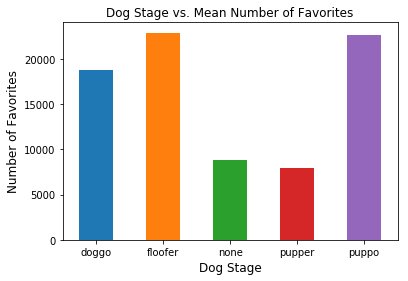

In [39]:
#plot bar graph of dog stage vs favorites
df.groupby('dog_stage').favorite_count.mean().plot(kind='bar')
plt.ylabel('Number of Favorites', size='large')
plt.xlabel('Dog Stage', size='large')
plt.xticks(rotation=0)
plt.title('Dog Stage vs. Mean Number of Favorites');

Tweets that classified the dogs as "floofers" and "puppos" received the highest number of favorites on average. Dogs classified as "pupper" or not classified received far fewer favorites on average.

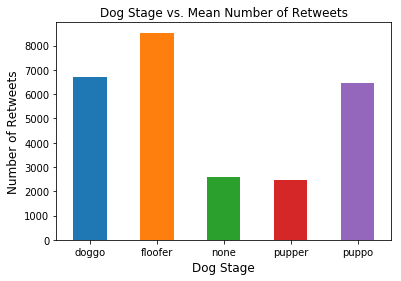

In [40]:
#plot bar graph of dog stage vs retweets
df.groupby('dog_stage').retweet_count.mean().plot(kind='bar')
plt.ylabel('Number of Retweets', size='large')
plt.xlabel('Dog Stage', size='large')
plt.xticks(rotation=0)
plt.title('Dog Stage vs. Mean Number of Retweets');

Tweets that classified the dogs as "floofers" received the highest number of retweets on average. Dogs classified as "pupper" or not classified received far fewer retweets on average.

In [41]:
#get mean favorite counts for 5 most popular breeds
golden = df.query('predicted_breed == "golden_retriever"').favorite_count.mean()
labrador = df.query('predicted_breed == "Labrador_retriever"').favorite_count.mean()
pembroke = df.query('predicted_breed == "Pembroke"').favorite_count.mean()
chihuahua = df.query('predicted_breed == "Chihuahua"').favorite_count.mean()
pug = df.query('predicted_breed == "pug"').favorite_count.mean()

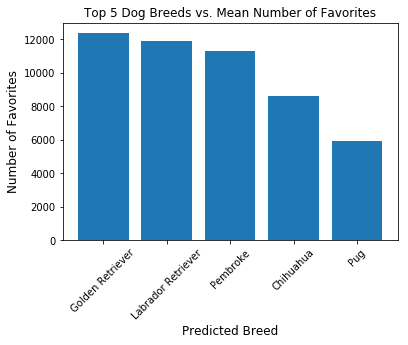

In [42]:
#plot bar graph of breed vs. favorites
bar_locs = [.5, 1.5, 2.5, 3.5, 4.5]
top5_means = [golden, labrador, pembroke, chihuahua, pug]
plt.bar(bar_locs, top5_means)
plt.ylabel('Number of Favorites', size='large')
plt.xlabel('Predicted Breed', size='large')
plt.xticks(bar_locs, ('Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Pug'), rotation=45)
plt.title('Top 5 Dog Breeds vs. Mean Number of Favorites');

Dogs predicted to be Golden Retrievers received the highest number of favorites, on average, among the 5 most popular dog breeds. The average number of favorites goes down as the popularity of the breed goes down for the top 5. 

In [43]:
#get mean retweet counts for 5 most popular breeds
golden = df.query('predicted_breed == "golden_retriever"').retweet_count.mean()
labrador = df.query('predicted_breed == "Labrador_retriever"').retweet_count.mean()
pembroke = df.query('predicted_breed == "Pembroke"').retweet_count.mean()
chihuahua = df.query('predicted_breed == "Chihuahua"').retweet_count.mean()
pug = df.query('predicted_breed == "pug"').retweet_count.mean()

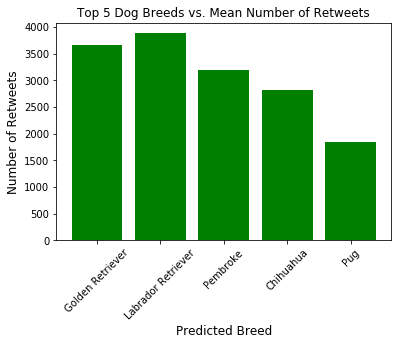

In [44]:
#plot bar graph of breed vs retweets
top5_means = [golden, labrador, pembroke, chihuahua, pug]
plt.bar(bar_locs, top5_means, color='green')
plt.ylabel('Number of Retweets', size='large')
plt.xlabel('Predicted Breed', size='large')
plt.xticks(bar_locs, ('Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Pug'), rotation=45)
plt.title('Top 5 Dog Breeds vs. Mean Number of Retweets');

Dogs predicted to be Labrador Retrievers received the highest number of retweets, on average, among the 5 most popular dog breeds with Golden Retrievers as a close second. 